In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.express as px
import numpy as np

In [14]:
df = pd.read_csv('supermarket.csv')

In [15]:
df.head()

,store_id,store_area,items_available,daily_customer_count,store_sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [16]:
df.info()id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   store_id              896 non-null    int64
 1   store_area            896 non-null    int64
 2   items_available       896 non-null    int64
 3   daily_customer_count  896 non-null    int64
 4   store_sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [38]:
df.store_sales.sum()

53178770

In [39]:
df.daily_customer_count.sum()

704570

In [17]:
df.describe()

,store_id,store_area,items_available,daily_customer_count,store_sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [18]:
df.columns.unique()

Index(['store_id', 'store_area', 'items_available', 'daily_customer_count',
       'store_sales'],
      dtype='object')

In [21]:
sorted_df = df.sort_values(by='store_sales', ascending=False)

# Filter for the top 5 stores with the largest sales
top_5_stores = sorted_df.nlargest(5, 'store_sales')

In [40]:
top_5_stores.avg()

AttributeError: 'DataFrame' object has no attribute 'avg'

In [27]:
sorted_2_df = df.sort_values(by='store_sales', ascending=False)

# Filter for the top 5 stores with the largest sales
bottom_5_stores = sorted_df.nsmallest(5, 'store_sales')

In [28]:
bottom_5_stores

,store_id,store_area,items_available,daily_customer_count,store_sales
31,32,1250,1508,990,14920
852,853,1477,1790,880,16370
775,776,1537,1877,660,17670
593,594,1624,1946,870,20270
352,353,1397,1686,850,21300


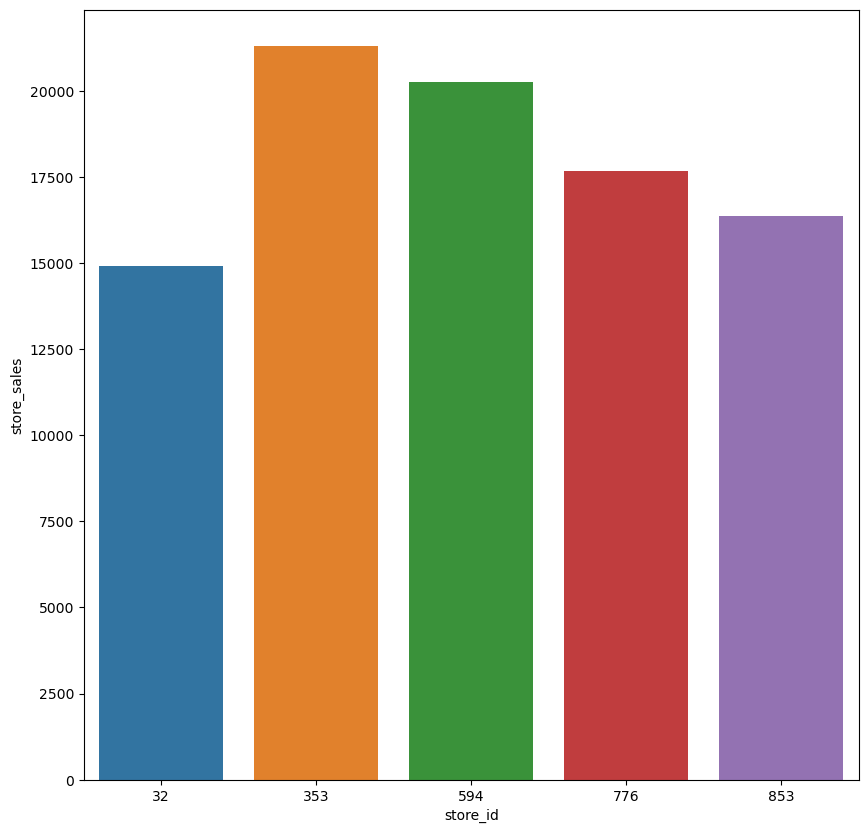

In [30]:
fig = plt.figure(figsize=(10,10))

ax = sns.barplot(x='store_id', y='store_sales', data=bottom_5_stores)

In [22]:
top_5_stores

,store_id,store_area,items_available,daily_customer_count,store_sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820


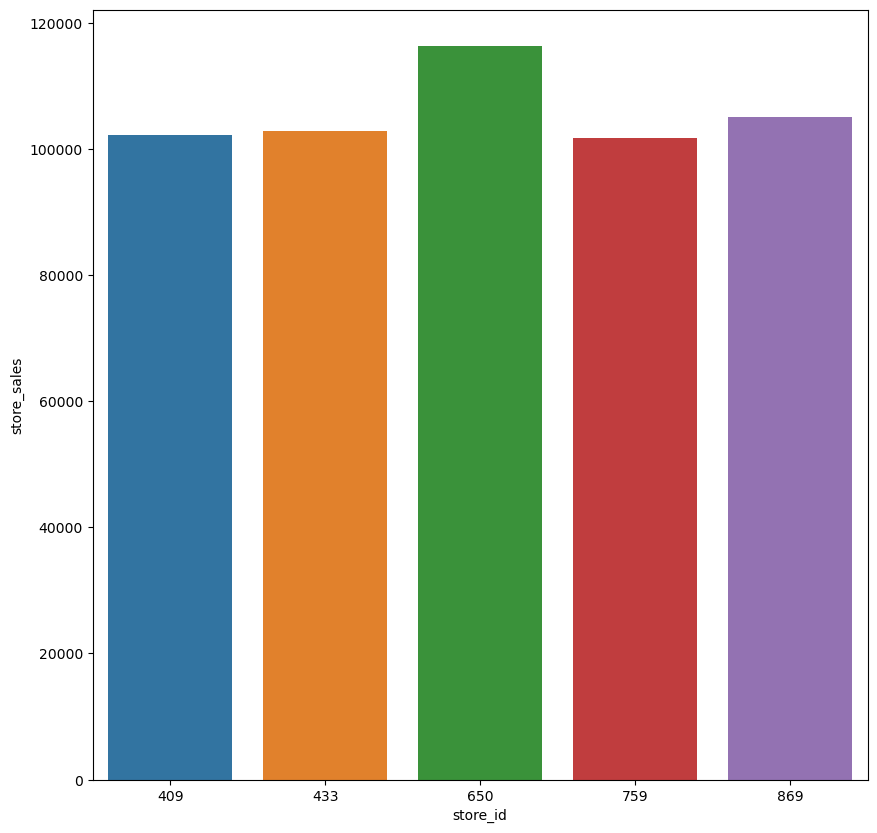

In [26]:
fig = plt.figure(figsize=(10,10))

ax = sns.barplot(x='store_id', y='store_sales', data=top_5_stores)

In [31]:
top_5_bottom_5_df = pd.concat([top_5_stores, bottom_5_stores])

In [32]:
top_5_bottom_5_df

,store_id,store_area,items_available,daily_customer_count,store_sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820
31,32,1250,1508,990,14920
852,853,1477,1790,880,16370
775,776,1537,1877,660,17670
593,594,1624,1946,870,20270
352,353,1397,1686,850,21300


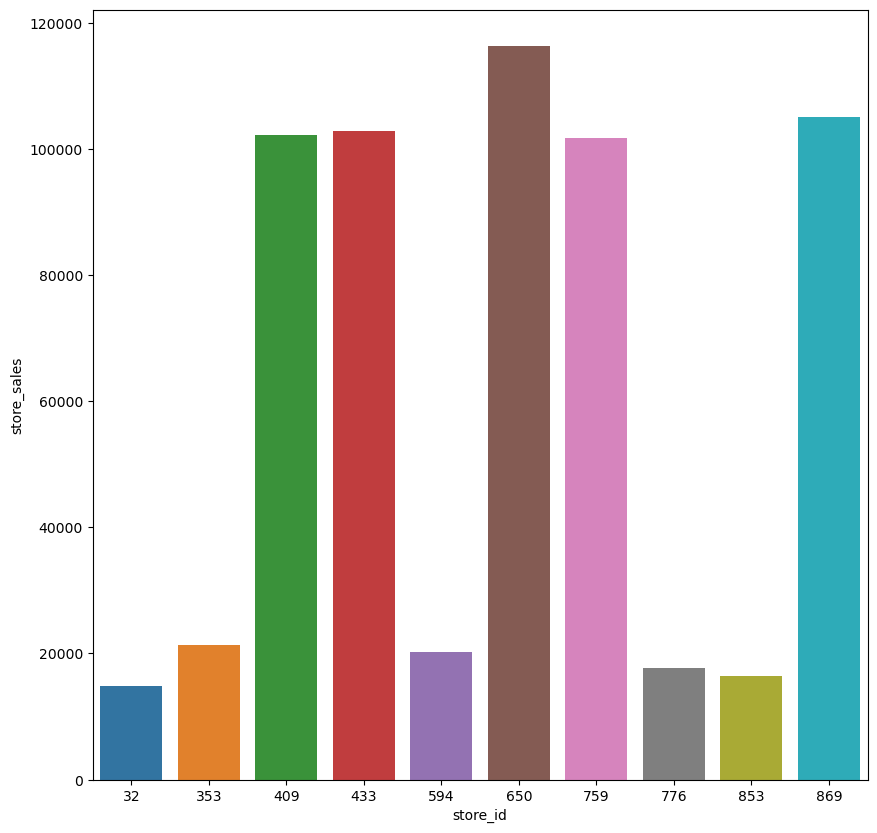

In [33]:
fig = plt.figure(figsize=(10,10))

ax = sns.barplot(x='store_id', y='store_sales', data=top_5_bottom_5_df)

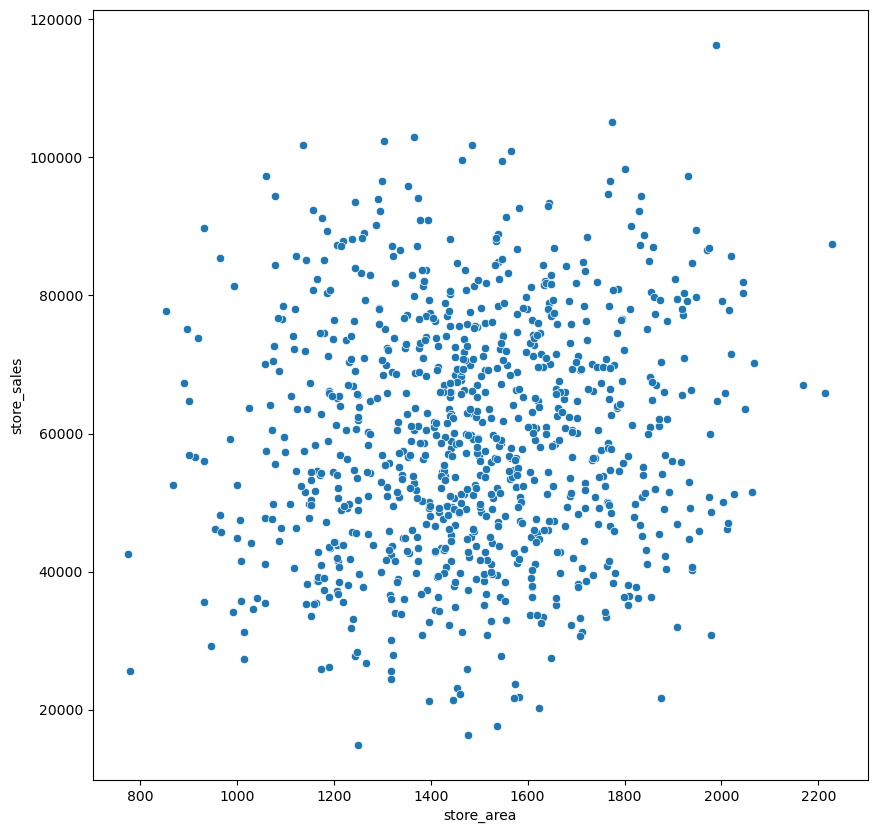

In [34]:
fig = plt.figure(figsize=(10,10))

ax = sns.scatterplot(x='store_area', y='store_sales', data=df)

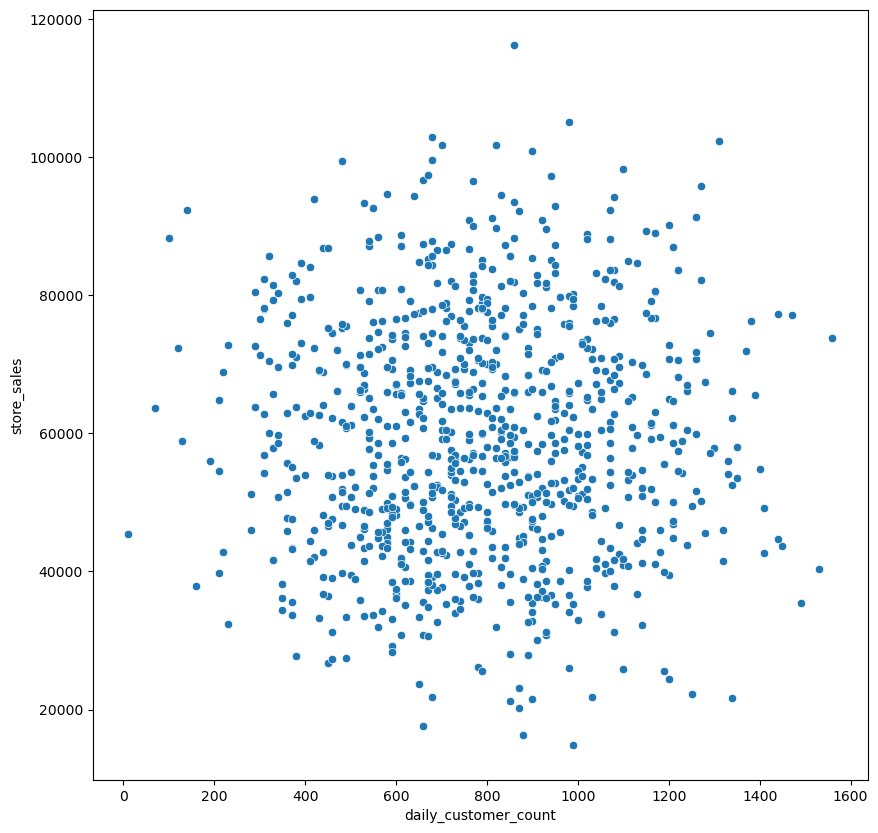

In [35]:
fig = plt.figure(figsize=(10,10))

ax = sns.scatterplot(x='daily_customer_count', y='store_sales', data=df)

<Figure size 640x480 with 0 Axes>

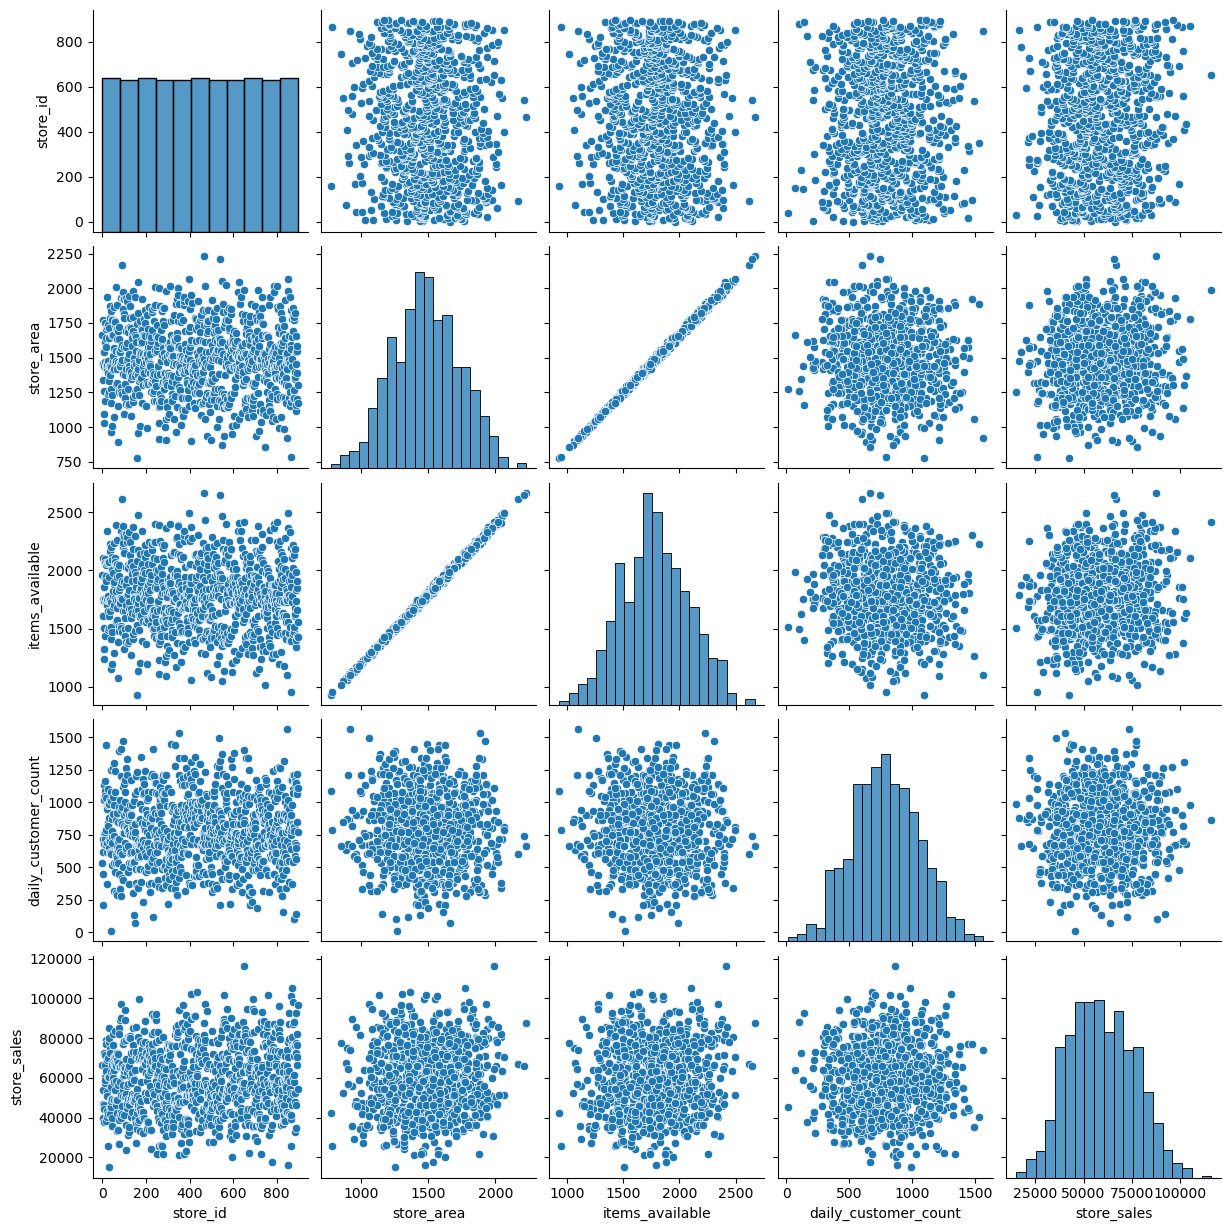

In [36]:
fig = plt.figure()

sns.pairplot(df)

<AxesSubplot:title={'center':'Heatmap of Manager Correlation Matrix'}>

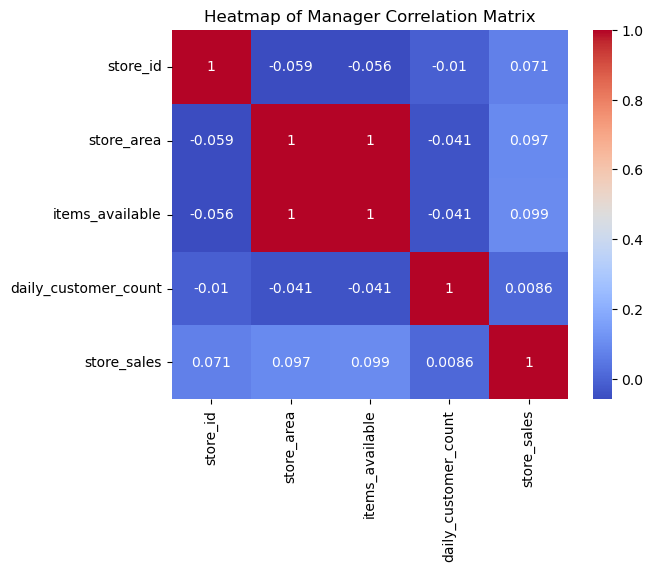

In [37]:
corr_matrix = df.corr()

fig = plt.figure()

plt.title("Heatmap of Manager Correlation Matrix")

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')